### Collision detection

Given `N` rectangles on the plane. Each has a width, a height and coordinates of the bottom left corner. Sides are parallel to the axes Ox and Oy. Each rectangle has a velocity, which is a 2-dimensional vector. 

Two rectangles may collide. One collision is a pair of rectangles which have a common point. When one of the rectangles is inside another it is a collision too.

Every tick each of the rectangles moves along its velocity vector.

####  The task

Given `T` ticks. On each tick output the number of collisions. Provide unit and stress tests.

#### Score

Your score depends on the speed and correctness of your algorithm. For the values `N` and `T` greater than 1000 it might be tricky to calculate everything in 1 second. The correct `O(T n^2)` algorithm gives you a good mark but only if there are a plenty of unit tests along with stress tests.

#### Hints

1) You can start with `O(T n^2)` algorithm, which simply checks all pairs of rectangles on every tick, but it does not pass all of the tests. You can verify your fast solution with this naive algorithm on small input.

2) Fast solutions might divide the plane in regions, sort the rectangles, even build trees of them. You can try any ideas in your solution.

3) There are many books and articles about collision detection, and many of them rely on simple data structures and algorithms such as sorting, trees (graphs without cycles) and so on. Try what you like.

4) See examples below.

5) Feel free to use or change DrawExample function. It might help you to visualize your ideas.

In [1]:
import numpy as np

In [2]:
class Point:
    def __init__(self, x, y):
        self.point = [x, y]

    def __getitem__(self, i):
        return self.point[i]
    
    def x(self):
        return self.point[0]
    
    def y(self):
        return self.point[1]

class Object:
    def __init__(self, velocity):
        self.velocity = velocity

class Rectangle(Object):
    def __init__(self, botLeft, width, height, velocity):
        super().__init__(velocity)
        self.botLeft = botLeft
        self.width = width
        self.height = height

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
def DrawExample(rectangles):
    colors = [
        'b',
        'r',
        'g',
        'c',
        'm',
        'y'
    ]
    fig, ax = plt.subplots()
    ax.plot()
    for rect, color in zip(rectangles, colors):
        p = patches.Rectangle(rect.botLeft, rect.width, rect.height, edgecolor=color, facecolor='none')
        ax.add_patch(p)
    return ax

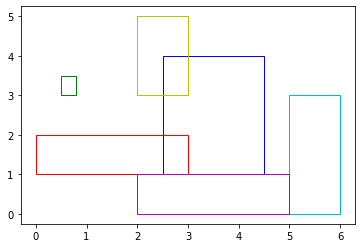

In [5]:
rectangles = [
    Rectangle(Point(2.5, 1), 2, 3, Point(0, 0)),
    Rectangle(Point(0, 1), 3, 1, Point(0.5, 1)),
    Rectangle(Point(0.5, 3), 0.3, 0.5, Point(0, 0)),
    Rectangle(Point(5, 0), 1, 3, Point(0, 0.5)),
    Rectangle(Point(2, 0), 3, 1, Point(0.5, 1)),
    Rectangle(Point(2, 3), 1, 2, Point(1, 1.5))
]
ax = DrawExample(rectangles)
plt.show()

You can run the below cell multiple times to see the movement of the red one.

In [6]:
tick = 1

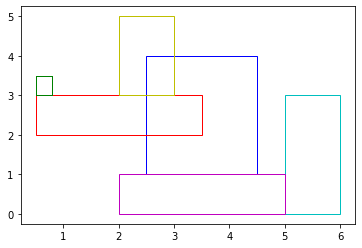

Tick 1


In [7]:
red = rectangles[1]
red.botLeft = Point(red.botLeft.x() + red.velocity.x(), red.botLeft.y() + red.velocity.y())
ax = DrawExample(rectangles)
ax.add_patch(patches.Rectangle((0.5, 3), 0.3, 0.5, edgecolor='g', facecolor='none'))
plt.show()
print("Tick", tick)
tick += 1

### First algorithm:

We need to specify the bottom left 'x' coordinate (just botLeft.x()) and the bottom right 'x' coordinate (botLeft.x() + width) for two rectangles that we are going to check for the collision.


lx1 = bottom left 'x' coordinate of the first rectangle

rx1 = bottom right 'x' coordinate of the first rectangle

lx2 = bottom left 'x' coordinate of the second rectangle 

rx2 = bottom right 'x' coordinate of the second rectangle

Also the bottom 'y' coordinate (botLeft.y()) and the top left 'y' coordinate (botLeft.y() + height)

ly1 = bottom left 'y' coordinate of the first rectangle

ty1 = top right 'y' coordinate of the first rectangle

ly2 = bottom left 'y' coordinate of the second rectangle

ty2 = top right 'y' coordinate of the second rectangle


The collision occurs if all 4 condition are true:

First two are for the horizontal detection

1) lx1 <= rx2 
If the left bottom corner of first rectangle is to the right than the right bottom corner of the second they can not collide. If lx1 = rx2 they have one common point, and if lx1 is less than rx2 rectangles can intersect each other.

2) rx1 >= lx2
If the right bottom corner of first rectangle is to th left than the left bottom corner of second they can not collide. If rx1 = lx2 they have one common point, and if rx1 is greater than lx2 rectangles can intersect each other.

Last two are for the vertical detection

3) ly1 <= ty2
If the left bottom corner of the first rectangle is above than the left top corner of second rectangle they can not collidde. If ly1 = ty2 they have one common point, and if ly1 is less than ty2 rectangles can intersect each other.

4) ty1 >= ly2
If the left top corner of the first rectangle is below than the left bottom corner of second rectangle they can not collidde. If ty1 = ly2 they have one common point, and if ty1 is greater than ly2 rectangles can intersect each other.


For each ticks, we will check the conditions for each rectangle one by one. 
Time complexity will be O(T*n^2)

In [8]:
rectangles = [
    Rectangle(Point(0, 1), 1, 2, Point(0, 0)),
    Rectangle(Point(2, 1), 1, 1, Point(0.5, 1)),
    Rectangle(Point(0.5, 1.5), 0.3, 0.5, Point(0.5, 0.5)),
    Rectangle(Point(1, 2), 1, 1, Point(1, 0.5)),
    
]

In [9]:
import copy
def CountCollisions(rects: [Rectangle], ticks: int):
    rects = copy.deepcopy(rects)
    for tick in range(ticks+1):
        collision = 0
        for i in range(len(rects)):
            for j in range(len(rects)):
                if i == j:
                    continue
                if (rects[i].botLeft.x() <= rects[j].botLeft.x() + rects[j].width and
                    rects[i].botLeft.x() + rects[i].width >= rects[j].botLeft.x() and
                    rects[i].botLeft.y() <= rects[j].botLeft.y() + rects[j].height and 
                    rects[i].botLeft.y() + rects[i].height >= rects[j].botLeft.y()):
                        collision +=1
        print('Tick: {0}\nCollisions: {1}'.format(tick, int(collision/2)))
        
        
        for rect in rects:
            rect.botLeft = Point(rect.botLeft.x() + rect.velocity.x(), rect.botLeft.y() + rect.velocity.y())

In [10]:
CountCollisions(rectangles, 4)

Tick: 0
Collisions: 3
Tick: 1
Collisions: 2
Tick: 2
Collisions: 1
Tick: 3
Collisions: 1
Tick: 4
Collisions: 1


### Second algorithm:
Next method almost same. Here I used the combinations function from the itertools to avoid double calculations. 

In [11]:
import itertools
import copy
def CountCollisions1(rects: [Rectangle], ticks: int):
    rects1 = copy.deepcopy(rects)
    for tick in range(ticks+1):
        collision = 0
        rect_comb = []
        for subset in itertools.combinations(rects1, 2):
            rect_comb.append(subset)
        
        for rects in rect_comb:
            if (rects[0].botLeft.x() <= rects[1].botLeft.x() + rects[1].width and
                rects[0].botLeft.x() + rects[0].width >= rects[1].botLeft.x() and
                rects[0].botLeft.y() <= rects[1].botLeft.y() + rects[1].height and 
                rects[0].botLeft.y() + rects[0].height >= rects[1].botLeft.y()):
                collision +=1
        print('Tick: {0}\nCollisions: {1}'.format(tick, collision))
        for rect in rects1:
            rect.botLeft = Point(rect.botLeft.x() + rect.velocity.x(), rect.botLeft.y() + rect.velocity.y())


### Third Algorithm:
Sweep and Prune algorithm. 

The algorithm is:

1) sort the rectangles according to the left x coordinates (sorted_rect)

2) prepare the list for active rectangles (active_rect) and possible intersections list (intersection_rect)

3) for each rectangle in the sorted_rect we will go by each rectangle in the active_rect. We will compare the right x coordinate (right1) of the rectangle from the sorted_list and the left x coordinate (left2) of the rectangle from active_rect. 

4) If left2 > right1, then the rectangles are not colliding, we can stop comparing. The compared active rectangle is removed from the list. We proceed with the next rectangle from the active rectanlges list.

5) If left2 <= right1, then the rectangles can collide.
    In this step to count the collision, we also need to compare the bottom and top y coordinates like in previous methods. If bottom y coordinate of the rectangle from the right1 rectangle is less than or equal to the up y coordinate of the left2 rectangle and the up y coordinate of the left2 rectangle is greater than or equal to the bottom y coordinate of the left rectangle than they collide.

6) Second rectangle added to the active_rect to compare for the next rectangles.

By keep doing the comparisons in this way we will compare less than n*2 times

7) We also need to go through the next tick after all steps and do the same steps.


In [12]:
def sweep_and_prune(rects: [Rectangle], ticks: int):
    rects = copy.deepcopy(rects)
    for tick in range(ticks+1):
        collisions_sp = 0
        sorted_rect = sorted(rects, key=lambda x:x.botLeft.x())
        active_rect = [sorted_rect[0]]

        for rect in sorted_rect[1:]:
            for active in active_rect[::-1]:
                if rect.botLeft.x() > active.botLeft.x() + active.width:
                    active_rect.remove(active)
                    continue
                elif rect.botLeft.y() <= active.botLeft.y() + active.height and rect.botLeft.y() + rect.height >= active.botLeft.y():
                        collisions_sp +=1
            active_rect.append(rect)
                
        for rect in rects:
            rect.botLeft = Point(rect.botLeft.x() + rect.velocity.x(), rect.botLeft.y() + rect.velocity.y())
        print('Tick: {0}\nCollisions: {1}'.format(tick, collisions_sp))

In [13]:
rectangles1 = [
    Rectangle(Point(1, 2), 1, 1, Point(1, 0.5)),
    Rectangle(Point(2, 2), 1, 1, Point(1, 0.5)),
    Rectangle(Point(2.5, 1.5), 0.3, 0.5, Point(0.5, 0.5)),
    Rectangle(Point(3, 2), 1, 1, Point(1, 0.5))
]


In [14]:
print('first')
CountCollisions(rectangles1,3)
print('second')
CountCollisions1(rectangles1,3)
print("third")
sweep_and_prune(rectangles1,3)

first
Tick: 0
Collisions: 3
Tick: 1
Collisions: 4
Tick: 2
Collisions: 3
Tick: 3
Collisions: 3
second
Tick: 0
Collisions: 3
Tick: 1
Collisions: 4
Tick: 2
Collisions: 3
Tick: 3
Collisions: 3
third
Tick: 0
Collisions: 3
Tick: 1
Collisions: 4
Tick: 2
Collisions: 3
Tick: 3
Collisions: 3


I will adjust the function before the test. They will return the collision for the given tick.

In [15]:
def CountCollisions(rects: [Rectangle], ticks: int):
    rects = copy.deepcopy(rects)
    for tick in range(ticks+1):
        collision = 0
        for i in range(len(rects)):
            for j in range(len(rects)):
                if i == j:
                    continue
                if (rects[i].botLeft.x() <= rects[j].botLeft.x() + rects[j].width and
                    rects[i].botLeft.x() + rects[i].width >= rects[j].botLeft.x() and
                    rects[i].botLeft.y() <= rects[j].botLeft.y() + rects[j].height and 
                    rects[i].botLeft.y() + rects[i].height >= rects[j].botLeft.y()):
                        collision +=1
        for rect in rects:
            rect.botLeft = Point(rect.botLeft.x() + rect.velocity.x(), rect.botLeft.y() + rect.velocity.y())
    return int(collision/2)

In [16]:
def CountCollisions1(rects: [Rectangle], ticks: int):
    rects1 = copy.deepcopy(rects)
    for tick in range(ticks+1):
        collision = 0
        rect_comb = []
        for subset in itertools.combinations(rects1, 2):
            rect_comb.append(subset)
    
        for rects in rect_comb: 
            if (rects[0].botLeft.x() <= rects[1].botLeft.x() + rects[1].width and
                rects[0].botLeft.x() + rects[0].width >= rects[1].botLeft.x() and
                rects[0].botLeft.y() <= rects[1].botLeft.y() + rects[1].height and 
                rects[0].botLeft.y() + rects[0].height >= rects[1].botLeft.y()):
                collision +=1
        
        for rect in rects1:
            rect.botLeft = Point(rect.botLeft.x() + rect.velocity.x(), rect.botLeft.y() + rect.velocity.y())
    return collision

In [17]:
def sweep_and_prune(rects: [Rectangle], ticks: int):
    rects = copy.deepcopy(rects)
    for tick in range(ticks+1):
        collisions_sp = 0
        sorted_rect = sorted(rects, key=lambda x:x.botLeft.x())
        active_rect = [sorted_rect[0]]

        for rect in sorted_rect[1:]:
            for active in active_rect[::-1]:
                if rect.botLeft.x() > active.botLeft.x() + active.width:
                    active_rect.remove(active)
                    continue
                elif rect.botLeft.y() <= active.botLeft.y() + active.height and rect.botLeft.y() + rect.height >= active.botLeft.y():
                        collisions_sp +=1
            active_rect.append(rect)
                
        for rect in rects:
            rect.botLeft = Point(rect.botLeft.x() + rect.velocity.x(), rect.botLeft.y() + rect.velocity.y())
    return collisions_sp

The list of rectangles for testing the functions

In [18]:
test_rectangles = [
    Rectangle(Point(0, 1), 1, 2, Point(0, 0)),
    Rectangle(Point(2, 1), 1, 1, Point(0.5, 1)),
    Rectangle(Point(0.5, 1.5), 0.3, 0.5, Point(0.5, 0.5)),
    Rectangle(Point(1, 2), 1, 1, Point(1, 0.5)),
    Rectangle(Point(0, 1.5), 1, 2, Point(0, 1)),
]

Let's visualise our rectangles for each tick, where we can count amount of collisions

tick:  0


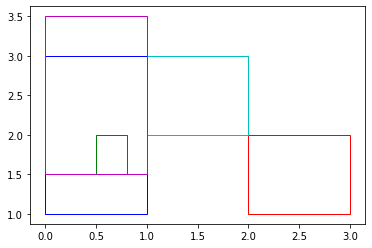

tick:  1


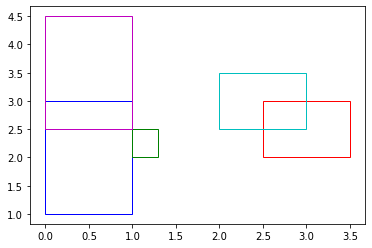

tick:  2


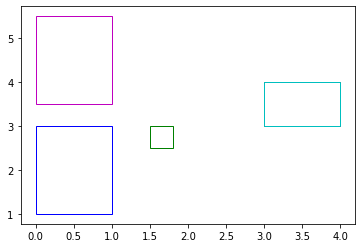

tick:  3


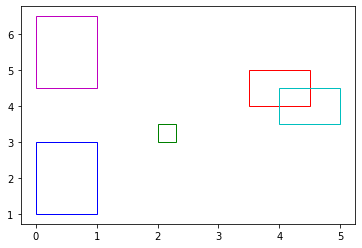

tick:  4


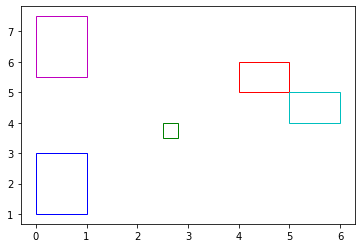

tick:  5


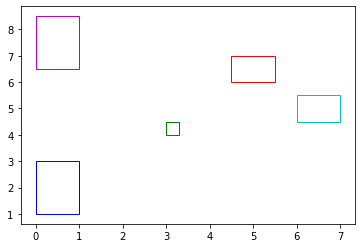

In [19]:
for i in range(6):
    tick = i
    print("tick: ", tick)
    ax = DrawExample(test_rectangles)
    plt.show()
    for rect in test_rectangles:
            rect.botLeft = Point(rect.botLeft.x() + rect.velocity.x(), rect.botLeft.y() + rect.velocity.y())
    

In [20]:
test_rectangles = [
    Rectangle(Point(0, 1), 1, 2, Point(0, 0)),
    Rectangle(Point(2, 1), 1, 1, Point(0.5, 1)),
    Rectangle(Point(0.5, 1.5), 0.3, 0.5, Point(0.5, 0.5)),
    Rectangle(Point(1, 2), 1, 1, Point(1, 0.5)),
    Rectangle(Point(0, 1.5), 1, 2, Point(0, 1)),
]

### Unit tests and stress tests

In [23]:
import time
def test_countCollision(test_rectangles, tick, answer):
    test_count = CountCollisions(test_rectangles, tick)
    message = 'Test failed\nTick: {0}\nObtained Output: {1}\nRight output: {2}'
    assert test_count == answer, message.format(tick,test_count,answer)
    print("Unit test is correct!")
    
def run_unit_test():
    test_countCollision(test_rectangles, 0, 6)
    test_countCollision(test_rectangles, 1, 4)
    test_countCollision(test_rectangles, 2, 1)
    test_countCollision(test_rectangles, 3, 1)
    test_countCollision(test_rectangles, 4, 1)
    test_countCollision(test_rectangles, 5, 0)

def test_countCollision1(test_rectangles, tick, answer):
    test_count = CountCollisions1(test_rectangles, tick)
    message = 'Test failed\nTick: {0}\nObtained Output: {1}\nRight output: {2}'
    assert test_count == answer, message.format(tick,test_count,answer)
    print("Unit test is correct!")
    
def run_unit_test1():
    test_countCollision1(test_rectangles, 0, 6)
    test_countCollision1(test_rectangles, 1, 4)
    test_countCollision1(test_rectangles, 2, 1)
    test_countCollision1(test_rectangles, 3, 1)
    test_countCollision1(test_rectangles, 4, 1)
    test_countCollision1(test_rectangles, 5, 0)


def test_countCollision2(test_rectangles, tick, answer):
    test_count = sweep_and_prune(test_rectangles, tick)
    message = 'Test failed\nTick: {0}\nObtained Output: {1}\nRight output: {2}'
    assert test_count == answer, message.format(tick,test_count,answer)
    print("Unit test is correct!")
    
def run_unit_test2():
    test_countCollision2(test_rectangles, 0, 6)
    test_countCollision2(test_rectangles, 1, 4)
    test_countCollision2(test_rectangles, 2, 1)
    test_countCollision2(test_rectangles, 3, 1)
    test_countCollision2(test_rectangles, 4, 1)
    test_countCollision2(test_rectangles, 5, 0)
    
    
def get_random_test(test_size):
    test_rect_list = []
    for i in range(test_size):
        test_rect_list.append(Rectangle(Point(np.random.randint(1,10), np.random.randint(1,10)),
                                        np.random.randint(1,10),
                                        np.random.randint(1,10),
                                       Point(np.random.randint(1,10), np.random.randint(1,10))))
    return test_rect_list


    
def run_stress_test(test_size, tick):
    ticks = np.random.randint(1,10)
    test_rect_list = get_random_test(test_size)
    time1 = time.time()
    test1 = CountCollisions(test_rect_list, ticks)
    time2 = time.time()
    test2 = CountCollisions1(test_rect_list, ticks)
    time3 = time.time()
    test3 = sweep_and_prune(test_rect_list, ticks)
    time4 = time.time()
    solution_runtime1 = time2 - time1
    solution_runtime2 = time3 - time2
    solution_runtime3 = time4 - time3
    
    message1 = 'Stress test failed in test1 and test2'
    message2 = 'Stress test failed in test1 and test2'
    assert test1 == test2, message1
    assert test2 == test3, message1
    print("Stress tests are correct!")
    print("Runtime_test_CountCollisions: ",solution_runtime1)
    print("Runtime_test_CountCollisions1: ",solution_runtime2)
    print("Runtime_test_sweep_and_prune: ",solution_runtime3)

def main():
    print("First method")
    run_unit_test()
    print("Second method")
    run_unit_test1()
    print("Third method")
    run_unit_test2()
    
    print("new_stress test")
    run_stress_test(1000,50)


if __name__ == "__main__":
    main()

First method
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
Second method
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
Third method
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
Unit test is correct!
new_stress test
Stress tests are correct!
Runtime_test_CountCollisions:  10.304464340209961
Runtime_test_CountCollisions1:  7.503090858459473
Runtime_test_sweep_and_prune:  1.7959060668945312


Unit tests and stress tests are passed. 
We can see that the fastest algorithm is the sweep and prune algorithm. 
I tried many times, the runtime for the sweep and prune was less than 2 sec when N = 1000 and T = 50.